In [ ]:
### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
file_path = r"C:\Users\npdan\IH_LABS/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
#Create a crosstab between the product `category` and the `isBestSeller` status.

crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result


isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [13]:
#Are there categories where being a best-seller is more prevalent? Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

# Step 1: Make sure isBestSeller is boolean
df['isBestSeller'] = df['isBestSeller'] == True  # converts truthy values to True/False

# Step 2: Group by category and calculate proportion
best_seller_proportion = (
    df.groupby('category')['isBestSeller']
    .mean()  # mean of booleans gives proportion of True
    .sort_values(ascending=False)
    .round(3)
)

# Step 3: Print the result
print("Proportion of Best-Sellers by Category (Descending):")
print(best_seller_proportion)


Proportion of Best-Sellers by Category (Descending):
category
Grocery                             0.058
Smart Home Security & Lighting      0.058
Health & Personal Care              0.058
Mobile Phone Accessories            0.042
Power & Hand Tools                  0.035
                                    ...  
CD, Disc & Tape Players             0.000
General Music-Making Accessories    0.000
Snowboard Boots                     0.000
Boxes & Organisers                  0.000
eBook Readers & Accessories         0.000
Name: isBestSeller, Length: 296, dtype: float64


In [17]:

# Create a contingency table
contingency = pd.crosstab(df['category'], df['isBestSeller'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared test p-value: {p:.4f}")

Chi-squared test p-value: 0.0000


In [9]:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [ ]:
# Since p-value < 0.05
# ➤ There is statistically significant evidence of an association between the two categorical variables.
# ➤ In other words, the variables are not independent.

In [19]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

In [ ]:
#Since p > 0.05, there's no significant association between category and best-seller status

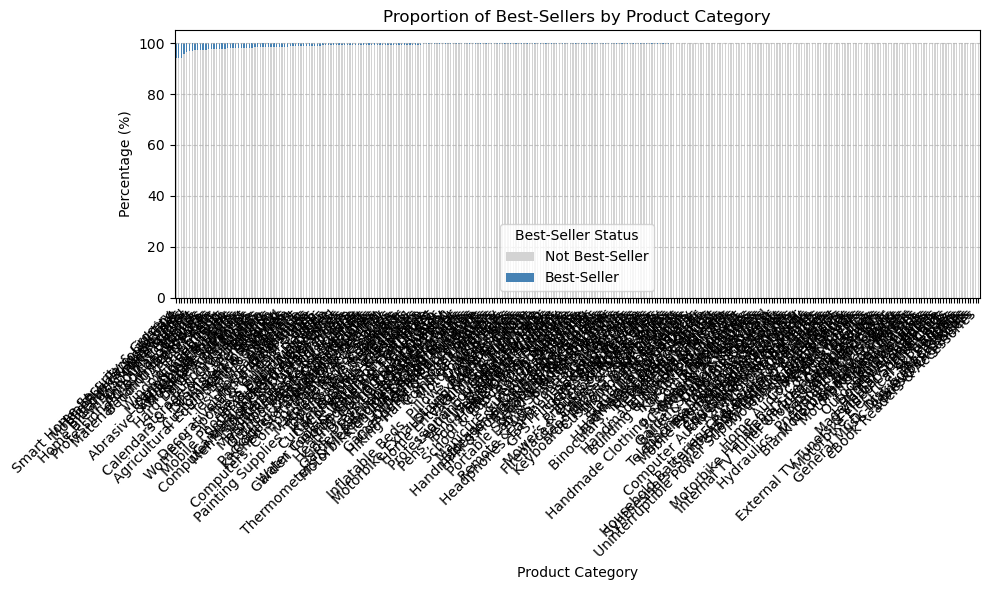

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure isBestSeller is boolean
df['isBestSeller'] = df['isBestSeller'] == True

# Create a crosstab of category vs best-seller status
category_bestseller = pd.crosstab(df['category'], df['isBestSeller'], normalize='index') * 100
category_bestseller.columns = ['Not Best-Seller', 'Best-Seller']
category_bestseller = category_bestseller.sort_values(by='Best-Seller', ascending=False)

# Plot stacked bar chart
category_bestseller.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgray', 'steelblue'])

plt.title('Proportion of Best-Sellers by Product Category')
plt.ylabel('Percentage (%)')
plt.xlabel('Product Category')
plt.legend(title='Best-Seller Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

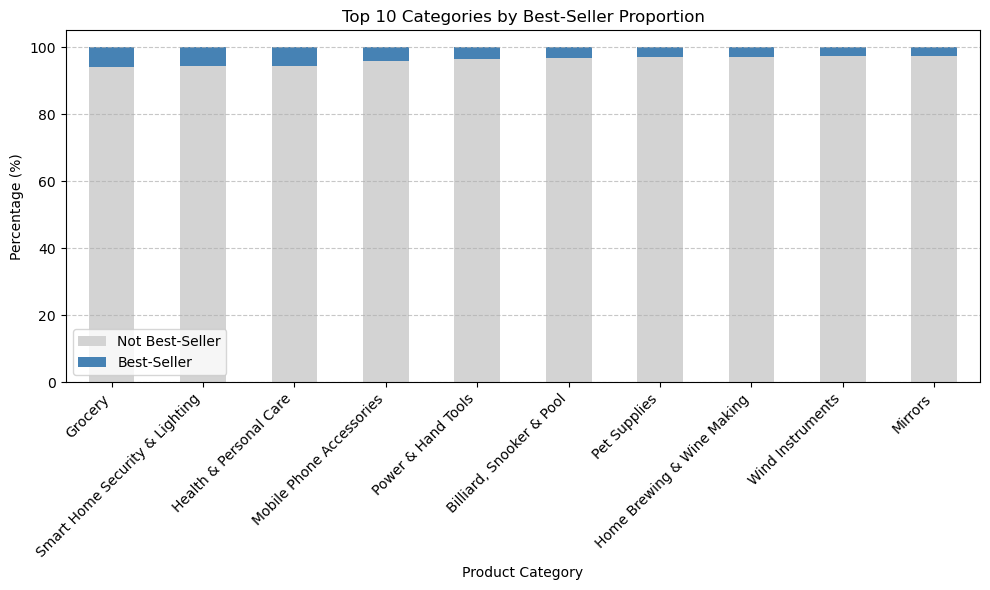

In [23]:
top_n = 10
top_categories = category_bestseller.head(top_n)

top_categories.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgray', 'steelblue'])
plt.title(f'Top {top_n} Categories by Best-Seller Proportion')
plt.ylabel('Percentage (%)')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.
0. **Preliminary Step: Remove outliers in product prices.**
	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
		*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [43]:
data_series = df['price'] 
outliers = tukeys_test_outliers(data_series)
print(outliers)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [41]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [ ]:
1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

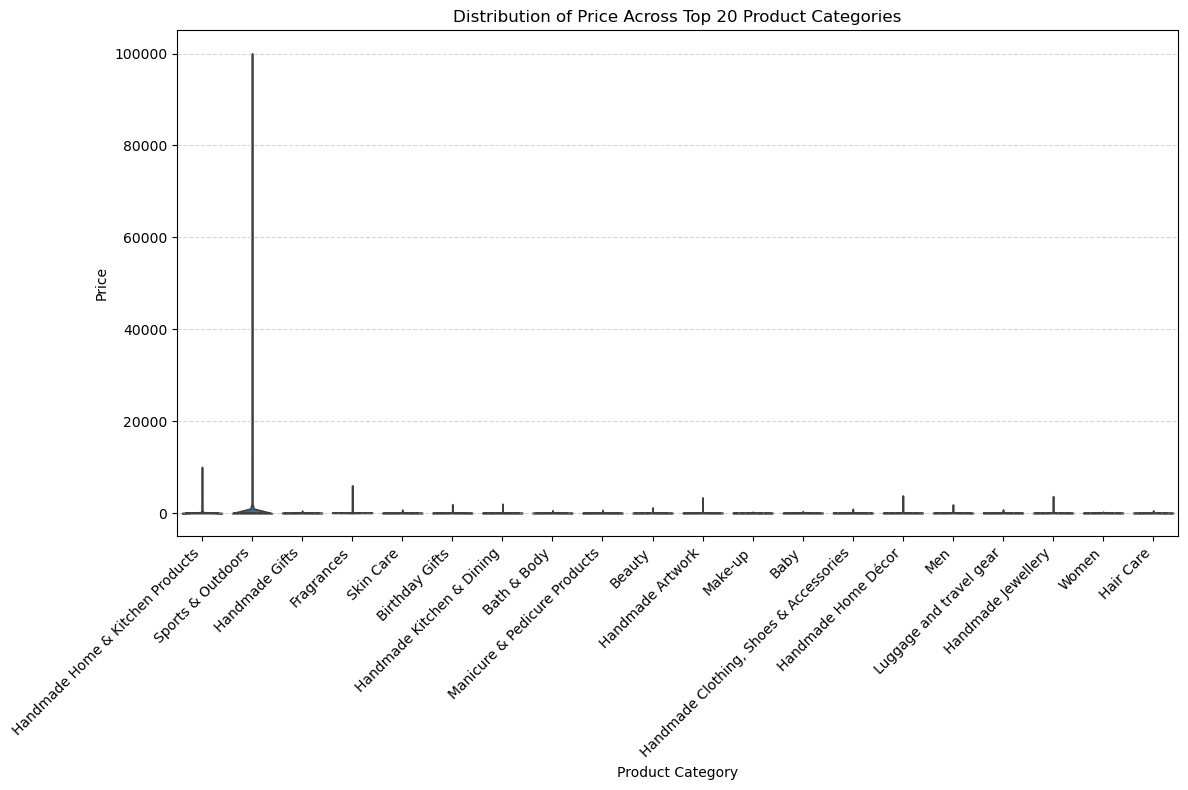

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get top 20 categories by frequency
top_20_categories = df['category'].value_counts().head(20).index

# Step 2: Filter the dataframe
df_filtered = df[df['category'].isin(top_20_categories)].copy()

# Step 3: Ensure 'price' is numeric
df_filtered['price'] = pd.to_numeric(df_filtered['price'], errors='coerce')

# Step 4: Plot the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=df_filtered,
    x='category',
    y='price',
    inner='quartile',
    density_norm='width'  # <-- updated for seaborn 0.13+
)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [54]:
# Remove outliers based on price quantiles
q_low = df_filtered['price'].quantile(0.01)
q_high = df_filtered['price'].quantile(0.99)
df_no_outliers = df_filtered[(df_filtered['price'] >= q_low) & (df_filtered['price'] <= q_high)]

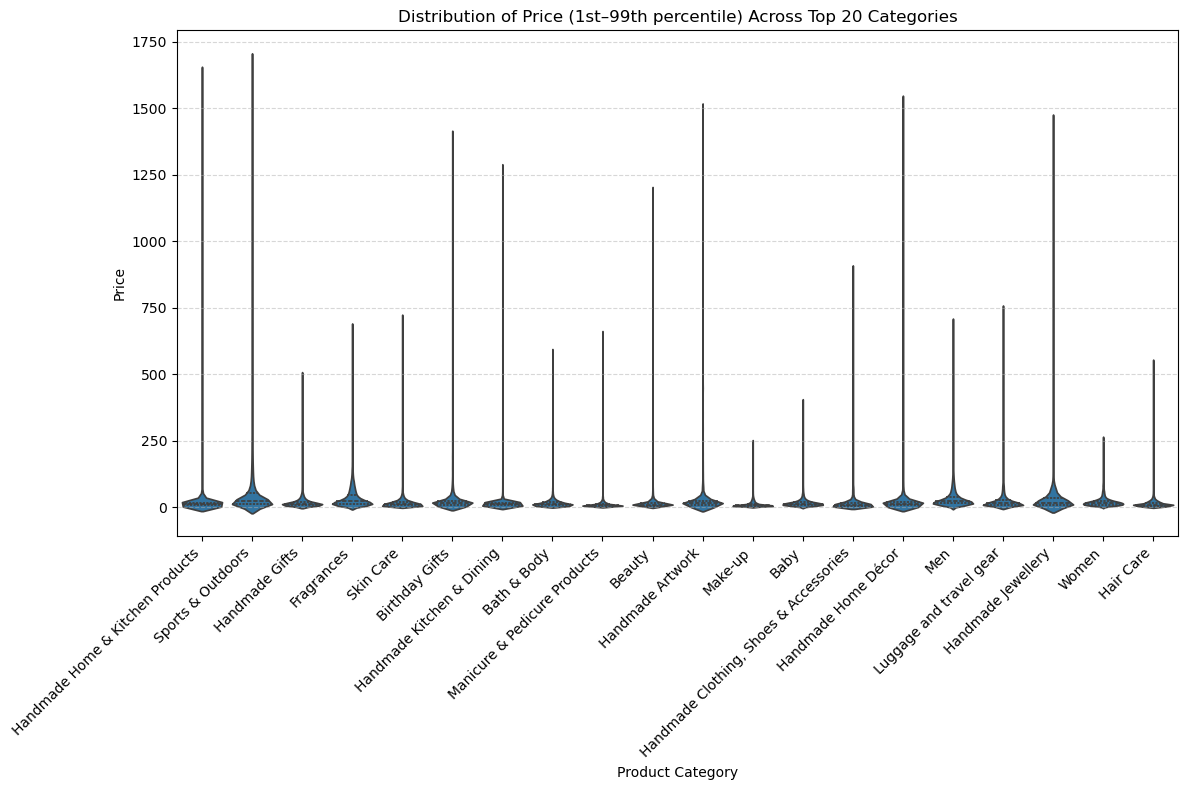

In [56]:
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=df_no_outliers,
    x='category',
    y='price',
    inner='quartile',
    density_norm='width'
)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Price (1st–99th percentile) Across Top 20 Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [58]:
#Which product category tends to have the highest median price? Don't filter here by top categories.

# Ensure 'price' is numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing prices
df_price_cleaned = df.dropna(subset=['price'])

# Group by category and compute median price
median_prices = df_price_cleaned.groupby('category')['price'].median().sort_values(ascending=False)

# Display top category
top_category = median_prices.idxmax()
top_median = median_prices.max()

print(f" Product category with the highest median price is **{top_category}**")
print(f" Median price in this category is {top_median:.2f}")

 Product category with the highest median price is **Laptops**
 Median price in this category is 1042.72


In [ ]:
#2. **Bar Charts**:
   # Create a bar chart comparing the average price of products for the top 10 product categories (based on count).


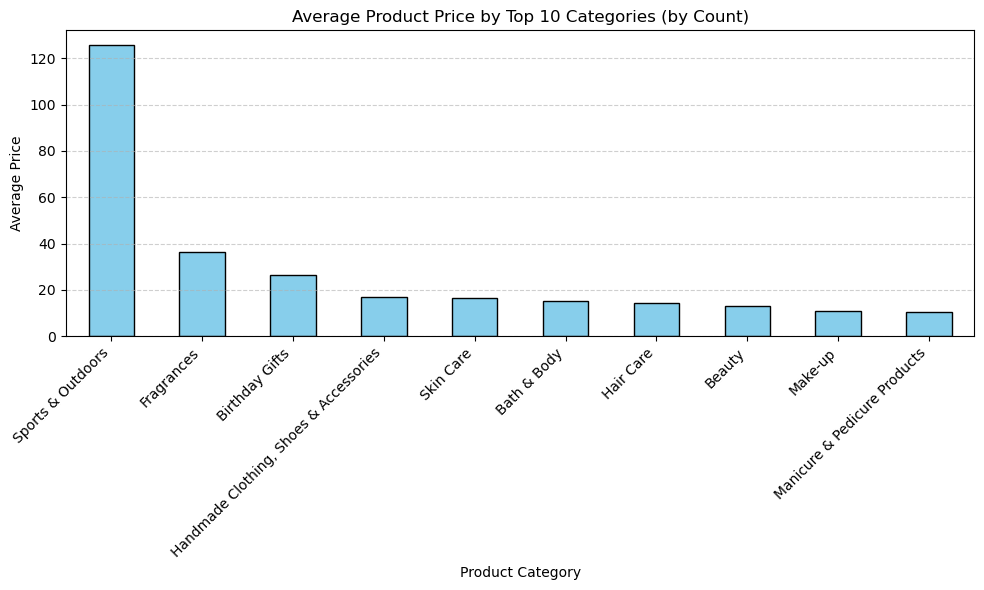

In [60]:
import matplotlib.pyplot as plt

# Ensure 'price' is numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Step 1: Get top 10 categories by number of products
top_10_categories = df['category'].value_counts().head(10).index

# Step 2: Filter to only these top categories
df_top10 = df[df['category'].isin(top_10_categories)].copy()

# Step 3: Group by category and calculate average price
avg_price_by_category = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

# Step 4: Plot bar chart
plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Product Price by Top 10 Categories (by Count)')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [65]:
#Which product category commands the highest average price? Don't filter here by top categories.

# Ensure 'price' is numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing prices
df_cleaned = df.dropna(subset=['price'])

# Group by category and compute average (mean) price
avg_price_by_category = df_cleaned.groupby('category')['price'].mean().sort_values(ascending=False)

# Get the top category
top_category = avg_price_by_category.idxmax()
top_avg_price = avg_price_by_category.max()

print(f"Product category with the highest average price is **{top_category}**")
print(f"Average price in this category is {top_avg_price:.2f}")

Product category with the highest average price is **Laptops**
Average price in this category is 1087.99


In [ ]:
#3. **Box Plots**:
    # Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots.

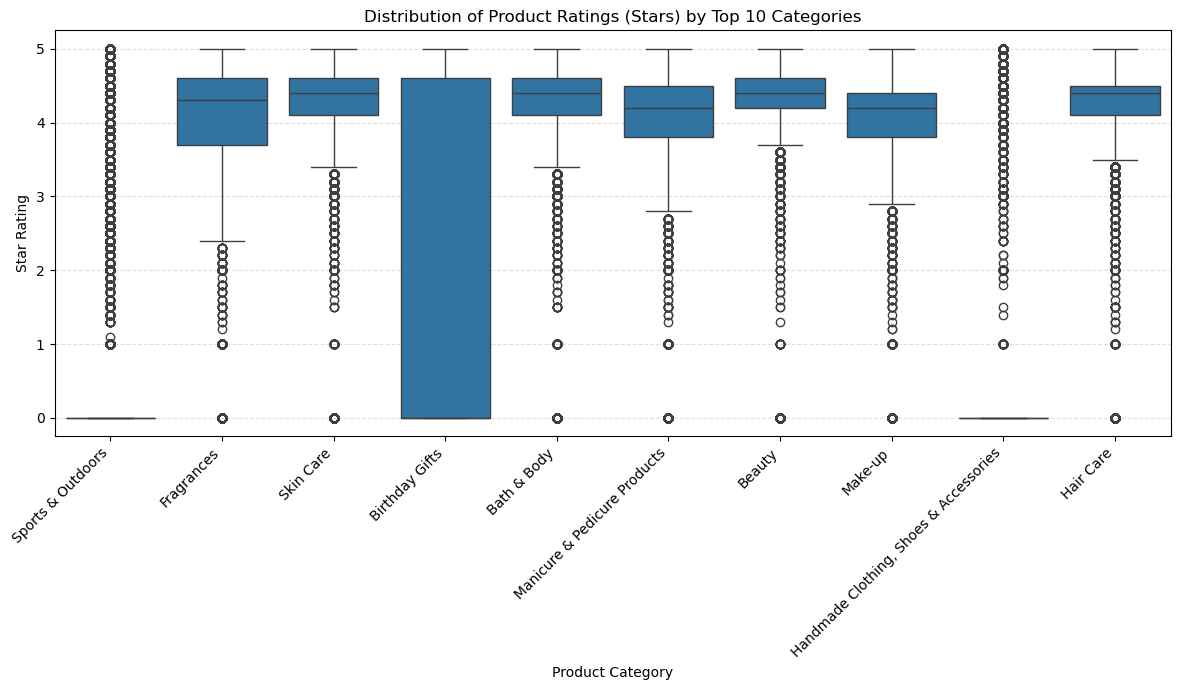

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'stars' is numeric
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Drop rows with missing values
df_cleaned = df.dropna(subset=['stars', 'category'])

# Step 1: Get top 10 categories by product count
top_10_categories = df_cleaned['category'].value_counts().head(10).index

# Step 2: Filter to top categories
df_top10 = df_cleaned[df_cleaned['category'].isin(top_10_categories)]

# Step 3: Plot box plot
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_top10, x='category', y='stars')

plt.title('Distribution of Product Ratings (Stars) by Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Star Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

C:\Users\npdan\AppData\Local\Temp\ipykernel_1064\2660381738.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




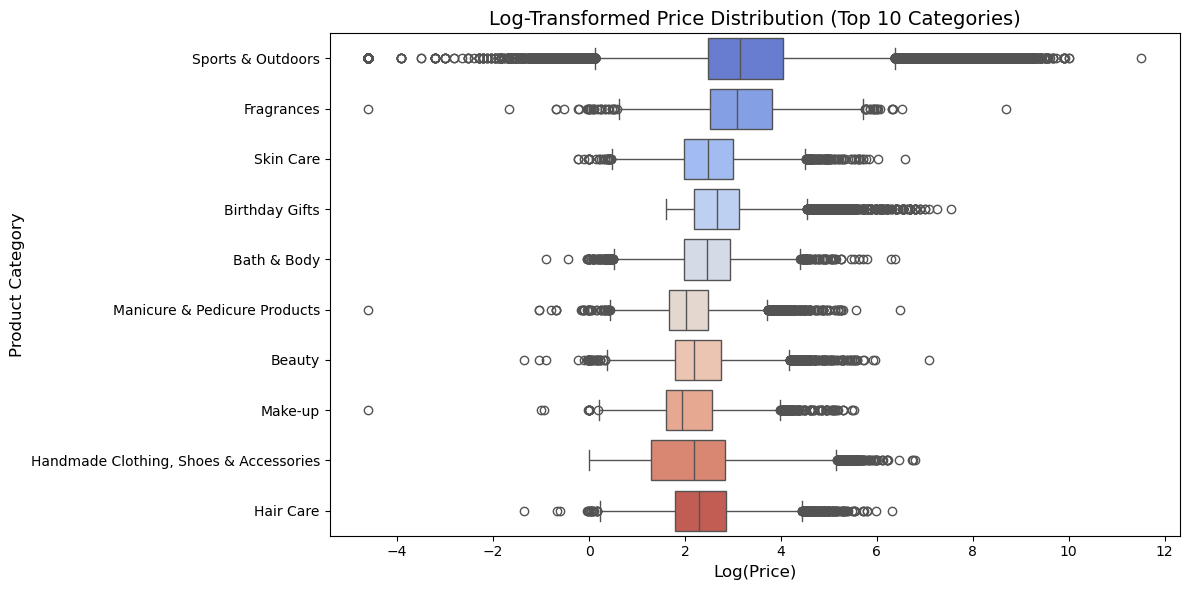

In [79]:
#Filter out the top 10 categories based on count for better visualization.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for top 10 categories by count
top_10_categories = df['category'].value_counts().head(10).index
df_top10 = df[df['category'].isin(top_10_categories)].copy()

# Ensure price is numeric and positive
df_top10['price'] = pd.to_numeric(df_top10['price'], errors='coerce')
df_top10 = df_top10[df_top10['price'] > 0]

# Add log-transformed price
df_top10['log_price'] = np.log(df_top10['price'])

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top10, x='log_price', y='category', palette='coolwarm')

plt.title('Log-Transformed Price Distribution (Top 10 Categories)', fontsize=14)
plt.xlabel('Log(Price)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()

In [81]:
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

# Ensure 'stars' is numeric
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Group by category and compute the median rating
median_ratings = df.groupby('category')['stars'].median().sort_values(ascending=False)

# Display the category with the highest median rating
highest_median_category = median_ratings.idxmax()
highest_median_value = median_ratings.max()

print(f"The category with the highest median rating is: '{highest_median_category}' with a median rating of {highest_median_value:.2f}")

The category with the highest median rating is: 'Computer Memory' with a median rating of 4.70


In [ ]:
### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [83]:
#Calculate the correlation coefficient between `price` and `stars` (Pearson correlation coefficient)

correlation = df['price'].corr(df['stars'])
correlation

-0.1249067326214861

In [85]:
#Calculate the correlation coefficient between `price` and `stars` (Spearman correlation coefficient)

correlation = df['price'].corr(df['stars'], method='spearman')
correlation

-0.1331642546243379

In [ ]:
# Conclusion :
# Pearson (−0.12): A very weak negative linear relationship.
# Spearman (−0.13): A very weak negative monotonic relationship. 
# Therefore, there are a very weak correlation between price and rating.

In [ ]:
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

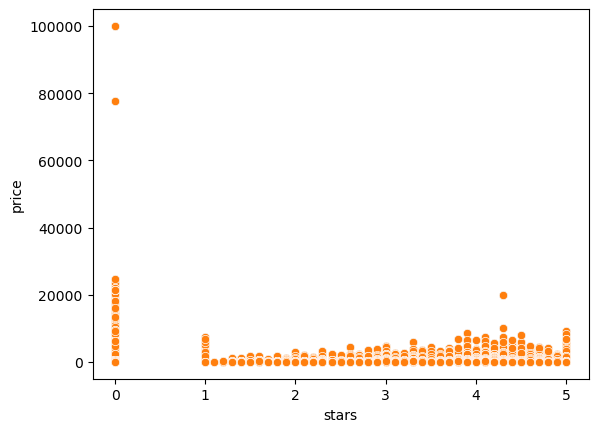

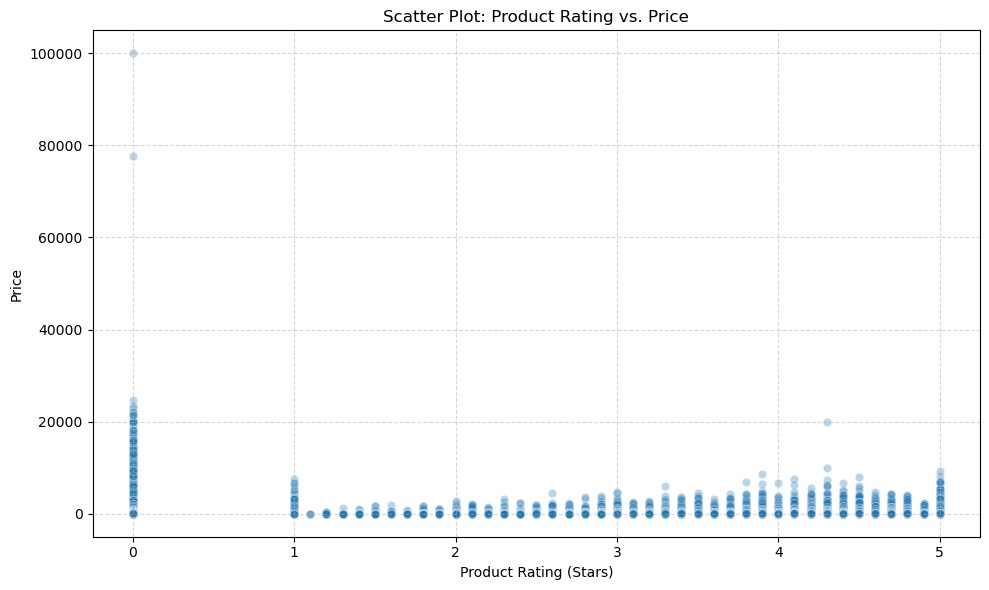

In [95]:
#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

# Make sure 'stars' and 'price' are numeric
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['stars', 'price'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='stars', y='price', alpha=0.3)

plt.title('Scatter Plot: Product Rating vs. Price')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#Conclusion : 
# Clusters: Ratings cluster around 3.8–5.0
# Outliers: Very high prices with low rating can signal issues.


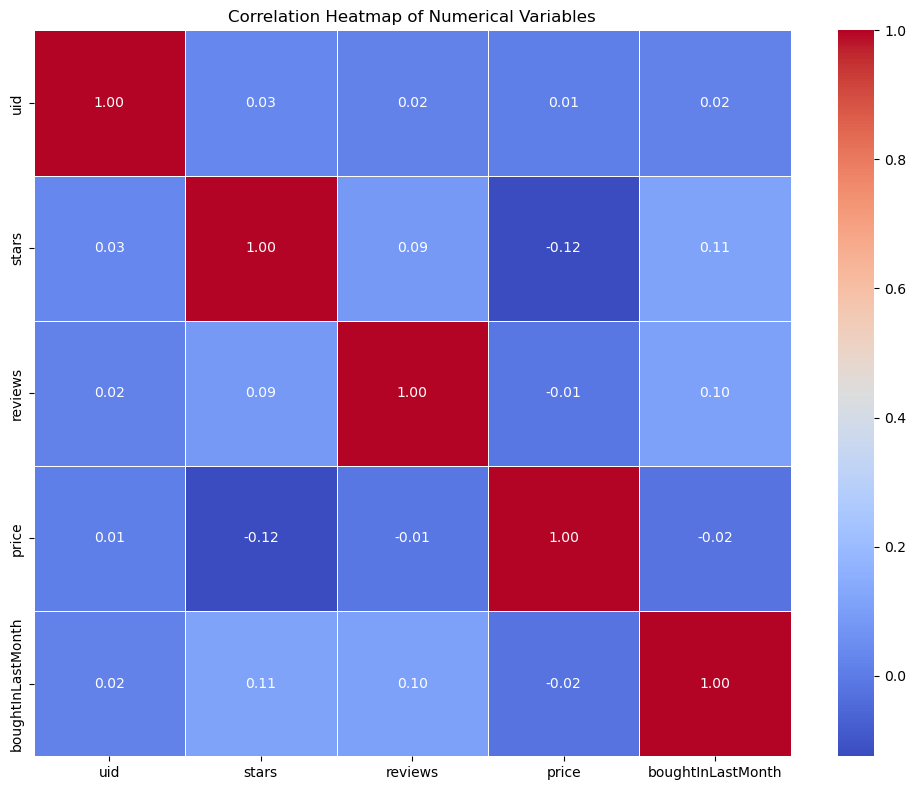

In [97]:
#Use a correlation heatmap to visualize correlations between all numerical variables.

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

In [ ]:
#Conclusion : Values are mostly near 0: there is no meaningful linear relationship.

<Figure size 600x600 with 0 Axes>

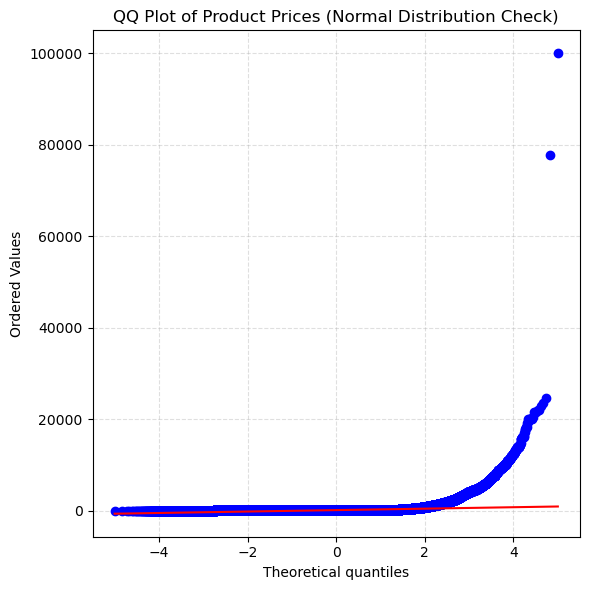

In [101]:
#Examine if product prices typically follow a normal distribution using a QQ plot. 

import scipy.stats as stats

# Ensure price is numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Filter out missing or non-positive values (since price must be > 0)
price_data = df['price'].dropna()
price_data = price_data[price_data > 0]

# Create QQ plot
plt.figure(figsize=(6, 6))
stats.probplot(price_data, dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices (Normal Distribution Check)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
# Interpretation:
# The points curve away (especially at the ends), the data is not normally distributed — which is very common for prices due to skewness and outliers.
# Long upward curves in the upper tail typically indicate positive skew (right-skewed), which is common for price data.